TensorFlow Version: 2.15.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          49664     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             

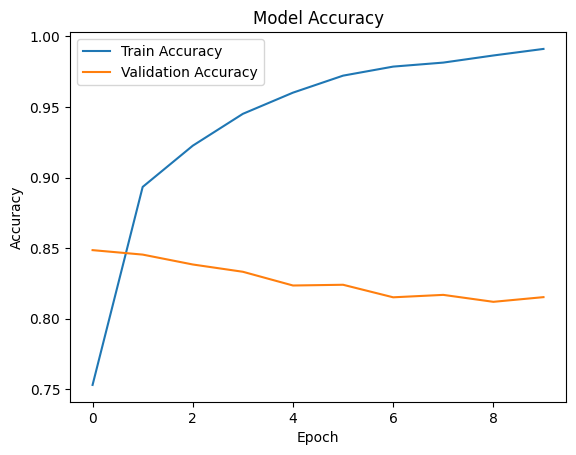

782/782 [==============================] - 37s 48ms/step - loss: 0.8286 - accuracy: 0.8153
Model performance on test data: [0.8285572528839111, 0.8153200149536133]
1/1 [==============================] - 2s 2s/step
Predicted sentiment: POSITIVE


In [5]:
# Import libraries
import tensorflow as tf #Core library for creating and training machine learning models
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

assert tf.__version__.startswith('2.'), "You need TensorFlow 2.0 or later"
print('TensorFlow Version:', tf.__version__)

# Load the dataset
text_data = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
train_data, test_data = text_data

# Unpacks the loaded data into training and testing sets
train_text = [text.numpy().decode('utf-8') for text, label in train_data]
train_labels = [label.numpy() for text, label in train_data]
test_text = [text.numpy().decode('utf-8') for text, label in test_data]
test_labels = [label.numpy() for text, label in test_data]

# Tokenization and padding that converts text to a sequence of integers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Sets a maximum sequence length of 100 words, padding shorter sequences and truncating longer ones
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_text)
max_length = 100
training_sequences = tokenizer.texts_to_sequences(train_text)
training_sequences = pad_sequences(training_sequences, maxlen=max_length)
testing_sequences = tokenizer.texts_to_sequences(test_text)
testing_sequences = pad_sequences(testing_sequences, maxlen=max_length)

# Model definition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Model building
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)), # Allows model to learn from both past and future context
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    training_sequences,
    np.array(train_labels),
    epochs=10,
    validation_data=(testing_sequences, np.array(test_labels)),
    batch_size=128
)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Evaluate the model
print("Model performance on test data:", model.evaluate(testing_sequences, np.array(test_labels)))

# Predict sentiment of a new review
new_review = "This movie was outstanding with stellar performances and great plot."
new_review_sequence = tokenizer.texts_to_sequences([new_review])
new_review_sequence = pad_sequences(new_review_sequence, maxlen=max_length)
prediction = model.predict(new_review_sequence)[0][0]
sentiment = "POSITIVE" if prediction > 0.5 else "NEGATIVE"
print("Predicted sentiment:", sentiment)
